In [6]:
import numpy as np
import matplotlib.pyplot as plt

number_of_arms = 10
number_of_rounds = 1000
epsilon = 0.1

true_probabilities = np.random.rand(number_of_arms)
print(f"True Probabilities: {true_probabilities}")

True Probabilities: [0.20086364 0.90156844 0.01671791 0.59836533 0.82615814 0.32933035
 0.6945428  0.92798497 0.38038169 0.92319233]


In [7]:
# Epsilon-Greedy
estimated_greedy_rewards = np.zeros(number_of_arms)
greedy_counts = np.zeros(number_of_arms)
total_greedy_reward = 0
greedy_rewards = np.zeros(number_of_rounds)
cumulative_greedy_regret = np.zeros(number_of_rounds)

# UCB
estimated_ubc_rewards = np.zeros(number_of_arms)
ubc_counts = np.zeros(number_of_arms)
total_ubc_reward = 0
ubc_rewards = np.zeros(number_of_rounds)
cumulative_ubc_regret = np.zeros(number_of_rounds)

# Thompson Sampling
successes = np.zeros(number_of_arms)
failures = np.zeros(number_of_arms)
total_thompson_reward = 0
thompson_rewards = np.zeros(number_of_rounds)
cumulative_thompson_regret = np.zeros(number_of_rounds)

# Optimal strategy variables
best_arm = np.argmax(true_probabilities)
optimal_reward = 0
optimal_rewards = np.zeros(number_of_rounds)

In [8]:
# Epsilon-Greedy Algorithm
for round in range(number_of_rounds):
    if np.random.rand() < epsilon:
        greedy_arm = np.random.randint(number_of_arms)
    else:
        greedy_arm = np.argmax(estimated_greedy_rewards)

    greedy_reward = np.random.rand() < true_probabilities[greedy_arm]

    greedy_counts[greedy_arm] += 1
    estimated_greedy_rewards[greedy_arm] += (greedy_reward - estimated_greedy_rewards[greedy_arm]) / greedy_counts[greedy_arm]

    total_greedy_reward += greedy_reward
    greedy_rewards[round] = total_greedy_reward

    optimal_rewards[round] = true_probabilities[best_arm]
    optimal_reward += optimal_rewards[round]
    cumulative_greedy_regret[round] = optimal_reward - total_greedy_reward

print(f"Estimated Greedy Rewards: {estimated_greedy_rewards}")
print(f"Greedy Counts: {greedy_counts}")
print(f"Cumulative Greedy Regret: {cumulative_greedy_regret}")

Estimated Greedy Rewards: [0.25       0.86666667 0.         0.77777778 0.84057971 0.35714286
 0.66666667 0.92399404 0.16666667 0.90517241]
Greedy Counts: [ 36.  30.  15.   9.  69.  42.   6. 671.   6. 116.]
Cumulative Greedy Regret: [-7.20150260e-02 -1.44030052e-01  7.83954922e-01  1.71193990e+00
  2.63992487e+00  3.56790984e+00  4.49589482e+00  4.42387979e+00
  4.35186477e+00  5.27984974e+00  6.20783471e+00  7.13581969e+00
  8.06380466e+00  8.99178964e+00  9.91977461e+00  1.08477596e+01
  1.17757446e+01  1.27037295e+01  1.36317145e+01  1.45596995e+01
  1.54876845e+01  1.64156694e+01  1.73436544e+01  1.82716394e+01
  1.91996244e+01  2.01276093e+01  2.00555943e+01  1.99835793e+01
  1.99115642e+01  2.08395492e+01  2.17675342e+01  2.16955192e+01
  2.26235041e+01  2.25514891e+01  2.24794741e+01  2.34074591e+01
  2.33354440e+01  2.42634290e+01  2.51914140e+01  2.51193990e+01
  2.60473839e+01  2.69753689e+01  2.79033539e+01  2.88313389e+01
  2.97593238e+01  3.06873088e+01  3.16152938e+01  3.2

In [9]:
# UCB Algorithm
for round in range(number_of_rounds):
    if round < number_of_arms:
        arm_ucb = round
    else:
        ucb_values = estimated_ubc_rewards + np.sqrt((2 * np.log(round + 1)) / ubc_counts)
        arm_ucb = np.argmax(ucb_values)

    reward_ucb = np.random.rand() < true_probabilities[arm_ucb]

    ubc_counts[arm_ucb] += 1
    estimated_ubc_rewards[arm_ucb] += (reward_ucb - estimated_ubc_rewards[arm_ucb]) / ubc_counts[arm_ucb]

    total_ubc_reward += reward_ucb
    ubc_rewards[round] = total_ubc_reward

    optimal_rewards[round] = true_probabilities[best_arm]
    optimal_reward += optimal_rewards[round]
    cumulative_ubc_regret[round] = optimal_reward - total_ubc_reward

print(f"Estimated UCB Rewards: {estimated_ubc_rewards}")
print(f"UCB Counts: {ubc_counts}")
print(f"Cumulative UCB Regret: {cumulative_ubc_regret}")

Estimated UCB Rewards: [0.07692308 0.91020408 0.07692308 0.52777778 0.69117647 0.375
 0.62264151 0.91472868 0.14285714 0.92391304]
UCB Counts: [ 13. 245.  13.  36.  68.  24.  53. 258.  14. 276.]
Cumulative UCB Regret: [ 928.912959    928.84094397  929.76892895  929.69691392  929.6248989
  929.55288387  930.48086884  930.40885382  931.33683879  931.26482377
  931.19280874  931.12079371  931.04877869  931.97676366  931.90474864
  931.83273361  931.76071858  932.68870356  933.61668853  933.54467351
  933.47265848  934.40064345  934.32862843  935.2566134   936.18459838
  936.11258335  936.04056832  935.9685533   936.89653827  937.82452325
  937.75250822  937.68049319  937.60847817  937.53646314  937.46444812
  938.39243309  938.32041806  938.24840304  938.17638801  938.10437299
  939.03235796  938.96034293  938.88832791  939.81631288  939.74429786
  939.67228283  939.6002678   939.52825278  940.45623775  940.38422273
  941.3122077   942.24019267  942.16817765  942.09616262  942.0241476
  9

In [10]:
# Thompson Sampling Algorithm
for round in range(number_of_rounds):
    sampled_values = [np.random.beta(successes[i] + 1, failures[i] + 1) for i in range(number_of_arms)]
    arm_thompson = np.argmax(sampled_values)

    reward_thompson = np.random.rand() < true_probabilities[arm_thompson]

    if reward_thompson:
        successes[arm_thompson] += 1
    else:
        failures[arm_thompson] += 1

    total_thompson_reward += reward_thompson
    thompson_rewards[round] = total_thompson_reward

    optimal_rewards[round] = true_probabilities[best_arm]
    optimal_reward += optimal_rewards[round]
    cumulative_thompson_regret[round] = optimal_reward - total_thompson_reward

print(f"Successes: {successes}")
print(f"Failures: {failures}")
print(f"Cumulative Thompson Sampling Regret: {cumulative_thompson_regret}")

Successes: [  0.  42.   0.   3.   4.   1.  15. 843.   2.   9.]
Failures: [ 2.  7.  2.  3.  2.  2.  5. 52.  3.  3.]
Cumulative Thompson Sampling Regret: [1855.89793303 1855.825918   1856.75390297 1857.68188795 1858.60987292
 1858.5378579  1858.46584287 1858.39382784 1858.32181282 1858.24979779
 1858.17778277 1858.10576774 1858.03375271 1858.96173769 1858.88972266
 1858.81770764 1858.74569261 1858.67367758 1858.60166256 1858.52964753
 1858.45763251 1858.38561748 1859.31360245 1859.24158743 1859.1695724
 1859.09755738 1860.02554235 1859.95352732 1859.8815123  1859.80949727
 1859.73748225 1859.66546722 1859.59345219 1859.52143717 1859.44942214
 1860.37740712 1861.30539209 1861.23337706 1861.16136204 1862.08934701
 1863.01733199 1862.94531696 1862.87330193 1862.80128691 1862.72927188
 1862.65725686 1862.58524183 1862.5132268  1862.44121178 1862.36919675
 1863.29718173 1863.2251667  1864.15315167 1864.08113665 1864.00912162
 1863.9371066  1863.86509157 1864.79307654 1864.72106152 1865.649046

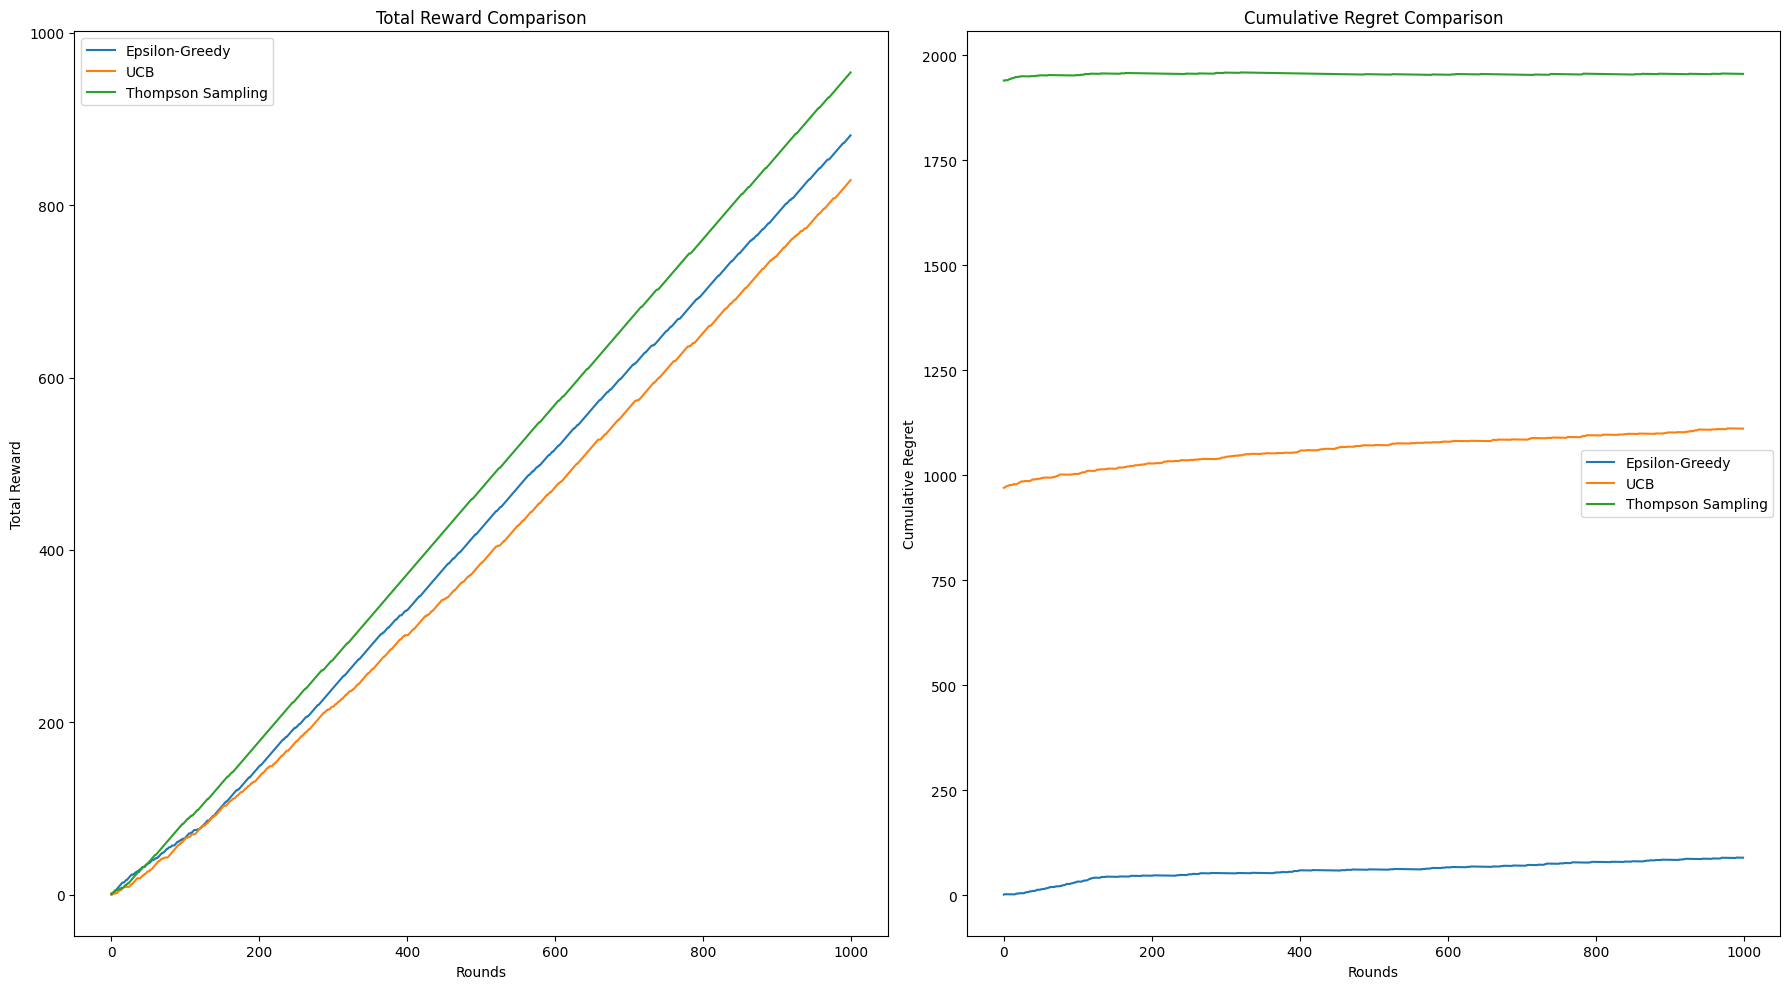

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 10))

# Total Rewards
plt.subplot(1, 2, 1)
plt.plot(greedy_rewards, label='Epsilon-Greedy')
plt.plot(ubc_rewards, label='UCB')
plt.plot(thompson_rewards, label='Thompson Sampling')
plt.xlabel('Rounds')
plt.ylabel('Total Reward')
plt.title('Total Reward Comparison')
plt.legend()

# Cumulative Regret
plt.subplot(1, 2, 2)
plt.plot(cumulative_greedy_regret, label='Epsilon-Greedy')
plt.plot(cumulative_ubc_regret, label='UCB')
plt.plot(cumulative_thompson_regret, label='Thompson Sampling')
plt.xlabel('Rounds')
plt.ylabel('Cumulative Regret')
plt.title('Cumulative Regret Comparison')
plt.legend()

plt.tight_layout()
plt.show()